In [98]:
# Import necessary libraries
import pycaret
from pycaret.classification import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline

In [99]:
# Load the dataset
url = 'https://raw.githubusercontent.com/Kelsey2701/spotify-project/main/reordered_music_playlists.csv'
df = pd.read_csv(url)

## Explore Dataset

In [100]:
# View dataset
df

,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,target,Track Name,Artist Name(s)
0,0.280000,0.724,207333,0.647,0.000000,1,0.102,-5.642,1,0.0658,106.960,4,0.435,0,"thank u, next",Ariana Grande
1,0.022300,0.702,203760,0.635,0.000000,11,0.283,-6.917,0,0.2650,144.004,4,0.873,0,Sorry Not Sorry,Demi Lovato
2,0.031600,0.774,246240,0.739,0.000006,0,0.119,-4.022,1,0.0952,126.002,4,0.823,0,Shout Out to My Ex,Little Mix
3,0.120000,0.660,200717,0.767,0.000000,2,0.181,-3.016,1,0.2610,181.819,4,0.554,0,"Sit Still, Look Pretty",Daya
4,0.000673,0.738,219733,0.875,0.000556,7,0.285,-3.141,1,0.1270,114.962,4,0.538,0,Wings,Little Mix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,0.142000,0.821,142657,0.636,0.000000,11,0.233,-4.479,1,0.1690,127.961,4,0.163,1,HOTEL LOBBY (Unc & Phew),"Quavo,Takeoff"
789,0.117000,0.938,123672,0.606,0.000000,6,0.528,-6.396,0,0.4190,121.108,4,0.706,1,SLUT ME OUT,NLE Choppa
790,0.046200,0.584,199906,0.889,0.828000,1,0.309,-5.941,0,0.0343,126.040,4,0.464,1,Levels - Radio Edit,Avicii
791,0.003830,0.561,175238,0.965,0.000007,7,0.371,-3.673,0,0.0343,128.040,4,0.304,1,I'm Good (Blue),"David Guetta,Bebe Rexha"


In [101]:
# Get summary statistics
df.describe()

,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,target
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,0.177292,0.669636,210915.528373,0.675170,0.037276,5.311475,0.198378,-6.414730,0.578815,0.115145,121.727765,3.970996,0.507165,0.762926
std,0.240997,0.152934,43459.659103,0.192336,0.132330,3.758839,0.156603,2.959503,0.494061,0.105705,27.421192,0.276003,0.238983,0.425557
min,0.000041,0.000000,13578.000000,0.048800,0.000000,0.000000,0.033500,-23.023000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015000,0.581000,183333.000000,0.562000,0.000000,1.000000,0.095300,-7.470000,0.000000,0.042700,101.003000,4.000000,0.314000,1.000000
50%,0.066000,0.687000,209423.000000,0.701000,0.000003,6.000000,0.136000,-5.781000,1.000000,0.067400,123.913000,4.000000,0.509000,1.000000
75%,0.239000,0.776000,231624.000000,0.833000,0.000807,9.000000,0.259000,-4.479000,1.000000,0.144000,137.996000,4.000000,0.705000,1.000000
max,0.978000,0.983000,386906.000000,0.976000,0.927000,11.000000,0.961000,-1.357000,1.000000,0.689000,203.911000,5.000000,0.976000,1.000000


In [102]:
# Get types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Acousticness      793 non-null    float64
 1   Danceability      793 non-null    float64
 2   Duration (ms)     793 non-null    int64  
 3   Energy            793 non-null    float64
 4   Instrumentalness  793 non-null    float64
 5   Key               793 non-null    int64  
 6   Liveness          793 non-null    float64
 7   Loudness          793 non-null    float64
 8   Mode              793 non-null    int64  
 9   Speechiness       793 non-null    float64
 10  Tempo             793 non-null    float64
 11  Time Signature    793 non-null    int64  
 12  Valence           793 non-null    float64
 13  target            793 non-null    int64  
 14  Track Name        793 non-null    object 
 15  Artist Name(s)    793 non-null    object 
dtypes: float64(9), int64(5), object(2)
memory us

In [103]:
# Check for missing values
print(df.isnull().sum())

Acousticness        0
Danceability        0
Duration (ms)       0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Loudness            0
Mode                0
Speechiness         0
Tempo               0
Time Signature      0
Valence             0
target              0
Track Name          0
Artist Name(s)      0
dtype: int64


## Visualize

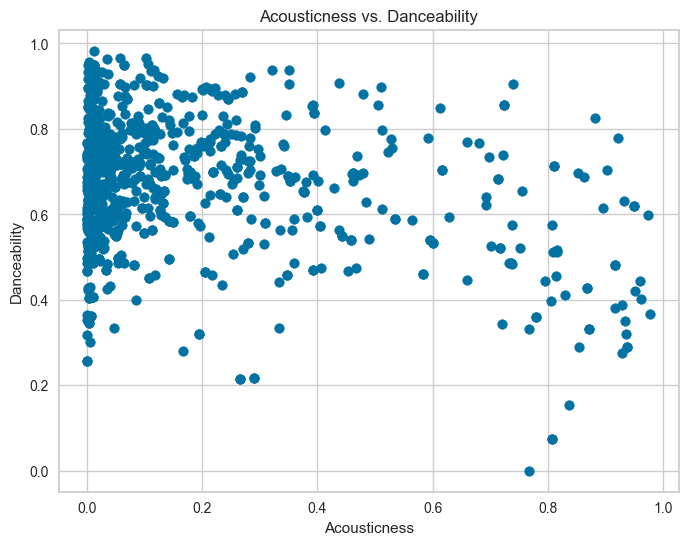

In [104]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Acousticness'], df['Danceability'])
plt.title('Acousticness vs. Danceability')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.grid(True)
plt.show()

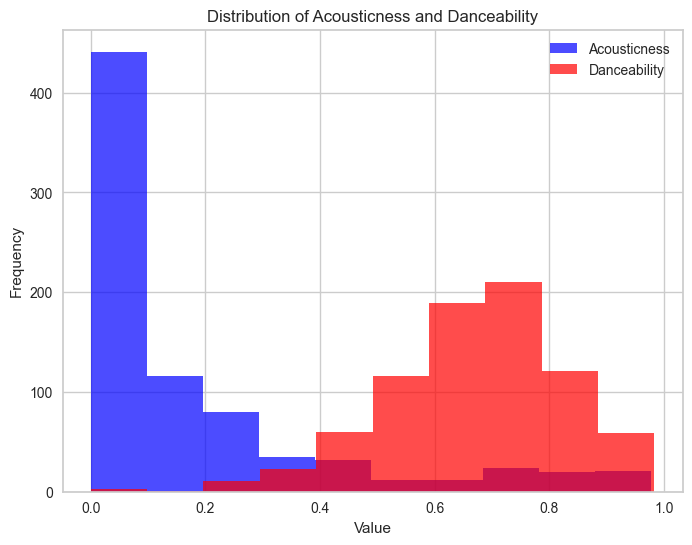

In [105]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Acousticness'], bins=10, alpha=0.7, color='blue', label='Acousticness')
plt.hist(df['Danceability'], bins=10, alpha=0.7, color='red', label='Danceability')
plt.title('Distribution of Acousticness and Danceability')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

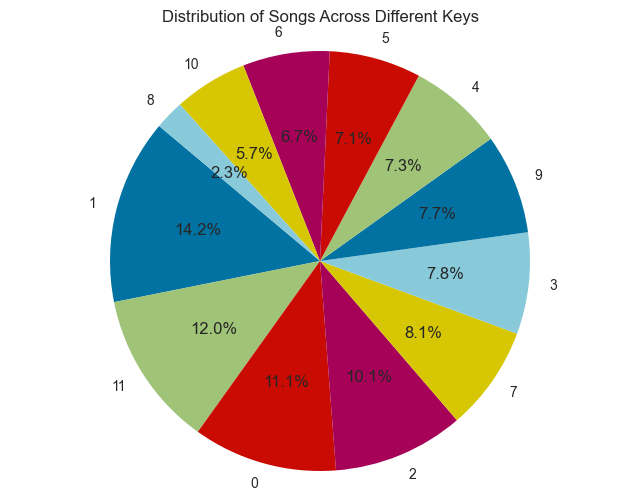

In [106]:
# Pie chart for distribution of songs across different keys
plt.figure(figsize=(8, 6))
plt.pie(df['Key'].value_counts(), labels=df['Key'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Songs Across Different Keys')
plt.axis('equal')
plt.show()

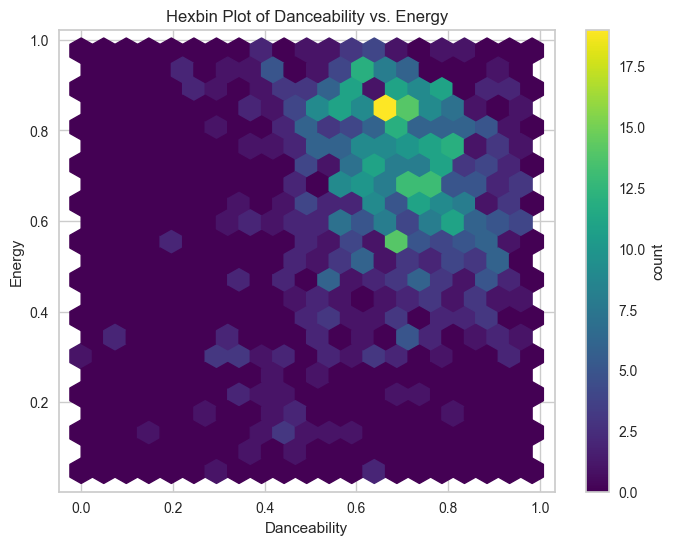

In [107]:
# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(df['Danceability'], df['Energy'], gridsize=20, cmap='viridis')
plt.colorbar(label='count')
plt.title('Hexbin Plot of Danceability vs. Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

# Training and testing

In [108]:
# init setup function
cat_features = ['Key', 'Mode']
ignore_features = ['Track Name', 'Artist Name(s)']
experiment = setup(df, target = 'target', categorical_features=cat_features, ignore_features=ignore_features)

,Description,Value
0,Session id,8203
1,Target,target
2,Target type,Binary
3,Original data shape,"(793, 16)"
4,Transformed data shape,"(793, 25)"
5,Transformed train set shape,"(555, 25)"
6,Transformed test set shape,"(238, 25)"
7,Ignore features,2
8,Numeric features,11
9,Categorical features,2


In [109]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [110]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key_6.0,Key_11.0,Key_7.0,Key_10.0,Key_1.0,...,Key_4.0,Key_9.0,Key_3.0,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
116,0.08350,0.816,184285.0,0.390,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1470,-10.756,0.0,0.1680,111.997002,4.0,0.818
689,0.00175,0.607,202666.0,0.805,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2310,-5.579,0.0,0.0608,139.893997,4.0,0.232
217,0.07950,0.723,139999.0,0.892,0.000075,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.2790,-7.172,1.0,0.1100,120.019997,4.0,0.501
27,0.48900,0.543,230266.0,0.390,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.1110,-7.202,1.0,0.0322,73.415001,4.0,0.303
397,0.10200,0.965,199266.0,0.692,0.000003,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0875,-4.080,1.0,0.2200,123.999001,4.0,0.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0.12300,0.925,145506.0,0.310,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0931,-6.531,0.0,0.2910,121.927002,4.0,0.291
324,0.04000,0.688,212146.0,0.847,0.000003,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.5980,-3.238,0.0,0.0508,93.978996,4.0,0.453
256,0.00108,0.468,188466.0,0.829,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0679,-5.420,0.0,0.0808,182.983994,4.0,0.350
750,0.08460,0.400,198773.0,0.915,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0503,-4.890,1.0,0.2800,88.917000,3.0,0.878


<Axes: >

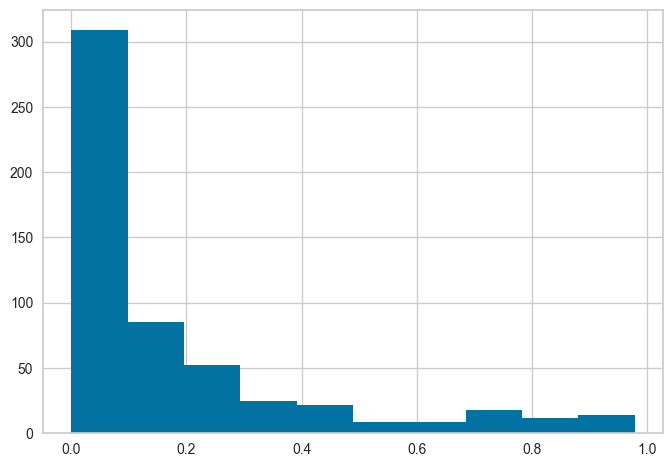

In [111]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Acousticness'].hist()

<Axes: >

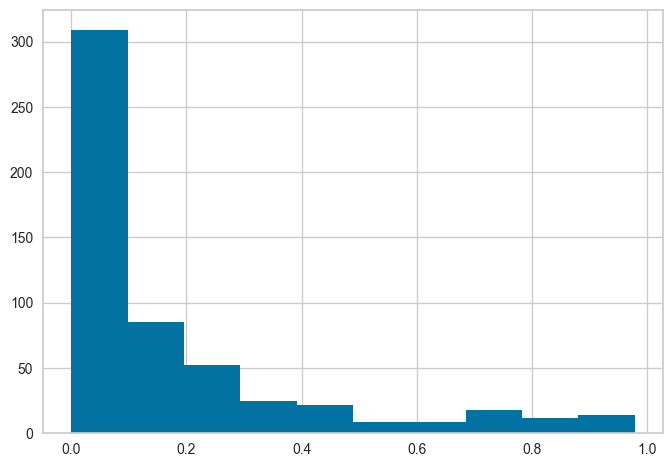

In [112]:
get_config('X_train')['Acousticness'].hist()

### Compare Models

In [113]:
best_model = compare_models(turbo=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8181,0.0000,0.9740,0.8216,0.8910,0.3632,0.4193,0.0310
nb,Naive Bayes,0.8090,0.0000,0.9810,0.8099,0.8869,0.3052,0.3832,0.0080
gbc,Gradient Boosting Classifier,0.8036,0.0000,0.9550,0.8188,0.8809,0.3320,0.3853,0.0410
lightgbm,Light Gradient Boosting Machine,0.7965,0.0000,0.9388,0.8207,0.8753,0.3332,0.3670,0.1500
et,Extra Trees Classifier,0.7928,0.0000,0.9503,0.8110,0.8750,0.2913,0.3220,0.0270
lr,Logistic Regression,0.7873,0.0000,0.9620,0.7995,0.8732,0.2457,0.3013,0.0260
ridge,Ridge Classifier,0.7856,0.0000,0.9597,0.7997,0.8721,0.2376,0.2891,0.0090
lda,Linear Discriminant Analysis,0.7802,0.0000,0.9432,0.8030,0.8672,0.2492,0.2866,0.0080
dt,Decision Tree Classifier,0.7715,0.0000,0.8560,0.8464,0.8498,0.3665,0.3713,0.0110
ada,Ada Boost Classifier,0.7710,0.0000,0.8983,0.8189,0.8560,0.2964,0.3118,0.0180


In [114]:
# create models with top 4 to test
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8036,0.0000,0.9762,0.8039,0.8817,0.3333,0.3977
1,0.8036,0.0000,0.9762,0.8039,0.8817,0.3333,0.3977
2,0.8214,0.0000,0.9070,0.8667,0.8864,0.4707,0.4734
3,0.6964,0.0000,0.8837,0.7600,0.8172,-0.0485,-0.0537
4,0.7857,0.0000,0.9070,0.8298,0.8667,0.3267,0.3352
5,0.8364,0.0000,1.0000,0.8235,0.9032,0.4043,0.5034
6,0.6909,0.0000,0.8333,0.7778,0.8046,0.0697,0.0706
7,0.8909,0.0000,1.0000,0.8750,0.9333,0.6405,0.6864
8,0.8545,0.0000,0.9762,0.8542,0.9111,0.5207,0.5580


In [115]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8036,0.0000,1.0000,0.7925,0.8842,0.2903,0.4121
1,0.8036,0.0000,0.9762,0.8039,0.8817,0.3333,0.3977
2,0.8393,0.0000,0.9767,0.8400,0.9032,0.4449,0.4933
3,0.7857,0.0000,0.9767,0.7925,0.8750,0.1785,0.2449
4,0.8214,0.0000,0.9767,0.8235,0.8936,0.3622,0.4211
5,0.8000,0.0000,0.9762,0.8039,0.8817,0.2720,0.3386
6,0.7818,0.0000,0.9524,0.8000,0.8696,0.2326,0.2707
7,0.8545,0.0000,0.9762,0.8542,0.9111,0.5207,0.5580
8,0.8545,0.0000,0.9762,0.8542,0.9111,0.5207,0.5580


In [116]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.0000,1.0000,0.7778,0.8750,0.2000,0.3333
1,0.8036,0.0000,0.9762,0.8039,0.8817,0.3333,0.3977
2,0.8214,0.0000,0.9302,0.8511,0.8889,0.4389,0.4504
3,0.7857,0.0000,1.0000,0.7818,0.8776,0.1135,0.2452
4,0.8214,0.0000,0.9767,0.8235,0.8936,0.3622,0.4211
5,0.8182,0.0000,0.9524,0.8333,0.8889,0.4009,0.4296
6,0.6727,0.0000,0.8333,0.7609,0.7955,-0.0143,-0.0147
7,0.8727,0.0000,1.0000,0.8571,0.9231,0.5669,0.6290
8,0.8545,0.0000,0.9762,0.8542,0.9111,0.5207,0.5580


In [117]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8214,0.0000,1.0000,0.8077,0.8936,0.3750,0.4804
1,0.7679,0.0000,0.9762,0.7736,0.8632,0.1613,0.2289
2,0.8393,0.0000,1.0000,0.8269,0.9053,0.4057,0.5044
3,0.7857,0.0000,1.0000,0.7818,0.8776,0.1135,0.2452
4,0.8214,0.0000,0.9767,0.8235,0.8936,0.3622,0.4211
5,0.8000,0.0000,1.0000,0.7925,0.8842,0.2173,0.3492
6,0.7818,0.0000,0.9762,0.7885,0.8723,0.1771,0.2433
7,0.8182,0.0000,0.9762,0.8200,0.8913,0.3605,0.4195
8,0.8182,0.0000,0.9286,0.8478,0.8864,0.4365,0.4480


**Which model has the highest recall while conserving accuracy?:** rf seems to have the best recall (0.96700) while conserving accuracy (0.7944).


# Hyperparameter Tuning

In [118]:
# tune rf model to optimize accuracy by iterating 50 times over the defined grid and displays the 6 metrics for each fold.
rf_tuned = tune_model(rf, n_iter=50, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.0000,1.0000,0.7778,0.8750,0.2000,0.3333
1,0.7857,0.0000,0.9762,0.7885,0.8723,0.2500,0.3203
2,0.8393,0.0000,0.9767,0.8400,0.9032,0.4449,0.4933
3,0.7857,0.0000,1.0000,0.7818,0.8776,0.1135,0.2452
4,0.8214,0.0000,0.9767,0.8235,0.8936,0.3622,0.4211
5,0.7818,0.0000,0.9762,0.7885,0.8723,0.1771,0.2433
6,0.7818,0.0000,0.9762,0.7885,0.8723,0.1771,0.2433
7,0.8364,0.0000,0.9762,0.8367,0.9011,0.4432,0.4917
8,0.8545,0.0000,0.9762,0.8542,0.9111,0.5207,0.5580


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [119]:
# evaluate the model
evaluate_model(rf_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [120]:
# plot feature importance and save as jpeg
plot_model(rf_tuned, plot = 'feature', save=True)

'Feature Importance.png'

### Ensemble Model
After hyperparameter tuning, we can try ensembling methods to improve model performance.

In [121]:
# ensemble with boosting
rf_boosted = ensemble_model(estimator=rf, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.0000,1.0000,0.7778,0.8750,0.2000,0.3333
1,0.7857,0.0000,0.9762,0.7885,0.8723,0.2500,0.3203
2,0.8571,0.0000,1.0000,0.8431,0.9149,0.4897,0.5695
3,0.7679,0.0000,0.9767,0.7778,0.8660,0.0761,0.1221
4,0.8214,0.0000,0.9767,0.8235,0.8936,0.3622,0.4211
5,0.8000,0.0000,1.0000,0.7925,0.8842,0.2173,0.3492
6,0.7091,0.0000,0.8810,0.7708,0.8222,0.0414,0.0444
7,0.8364,0.0000,1.0000,0.8235,0.9032,0.4043,0.5034
8,0.8364,0.0000,0.9762,0.8367,0.9011,0.4432,0.4917


In [122]:
# ensemble with bagging
rf_bagged = ensemble_model(estimator=rf, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7679,0.0000,1.0000,0.7636,0.8660,0.1034,0.2335
1,0.8036,0.0000,0.9762,0.8039,0.8817,0.3333,0.3977
2,0.8214,0.0000,0.9767,0.8235,0.8936,0.3622,0.4211
3,0.7857,0.0000,1.0000,0.7818,0.8776,0.1135,0.2452
4,0.8214,0.0000,0.9767,0.8235,0.8936,0.3622,0.4211
5,0.7818,0.0000,0.9762,0.7885,0.8723,0.1771,0.2433
6,0.7273,0.0000,0.9048,0.7755,0.8352,0.0720,0.0799
7,0.8545,0.0000,1.0000,0.8400,0.9130,0.4884,0.5684
8,0.8364,0.0000,0.9762,0.8367,0.9011,0.4432,0.4917


**Conclusion:** Ensembling did not improve model performance.

### Blending Models
Blending is another method of optimization that builds a voting classifier on top of estimators to help us further determine which model is best.

In [123]:
# blend all 4 models
blend1 = blend_models(estimator_list=[rf, lightgbm, nb, gbc])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:51:26
Status,. . . . . . . . . . . . . . . . . .,Compiling Estimators
Estimator,. . . . . . . . . . . . . . . . . .,Voting Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.0000,1.0000,0.7778,0.8750,0.2000,0.3333
1,0.8036,0.0000,0.9762,0.8039,0.8817,0.3333,0.3977
2,0.8750,0.0000,0.9767,0.8750,0.9231,0.5950,0.6216
3,0.7679,0.0000,0.9767,0.7778,0.8660,0.0761,0.1221
4,0.8214,0.0000,0.9767,0.8235,0.8936,0.3622,0.4211
5,0.8000,0.0000,1.0000,0.7925,0.8842,0.2173,0.3492
6,0.7636,0.0000,0.9524,0.7843,0.8602,0.1396,0.1738
7,0.8727,0.0000,1.0000,0.8571,0.9231,0.5669,0.6290
8,0.8545,0.0000,0.9762,0.8542,0.9111,0.5207,0.5580


In [124]:
# blend top 3 models
blend_2 = blend_models(estimator_list=[rf, lightgbm, nb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.0000,1.0000,0.7778,0.8750,0.2000,0.3333
1,0.8036,0.0000,0.9762,0.8039,0.8817,0.3333,0.3977
2,0.8750,0.0000,1.0000,0.8600,0.9247,0.5683,0.6300
3,0.7679,0.0000,0.9535,0.7885,0.8632,0.1415,0.1760
4,0.8214,0.0000,0.9767,0.8235,0.8936,0.3622,0.4211
5,0.8000,0.0000,1.0000,0.7925,0.8842,0.2173,0.3492
6,0.7636,0.0000,0.9524,0.7843,0.8602,0.1396,0.1738
7,0.8727,0.0000,1.0000,0.8571,0.9231,0.5669,0.6290
8,0.8364,0.0000,0.9762,0.8367,0.9011,0.4432,0.4917


In [125]:
# blend top 2 models
blend_3 = blend_models(estimator_list=[rf, lightgbm])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8036,0.0000,1.0000,0.7925,0.8842,0.2903,0.4121
1,0.8036,0.0000,0.9762,0.8039,0.8817,0.3333,0.3977
2,0.8571,0.0000,0.9535,0.8723,0.9111,0.5511,0.5655
3,0.7321,0.0000,0.9302,0.7692,0.8421,0.0094,0.0117
4,0.8214,0.0000,0.9535,0.8367,0.8913,0.4030,0.4316
5,0.8364,0.0000,1.0000,0.8235,0.9032,0.4043,0.5034
6,0.7091,0.0000,0.8810,0.7708,0.8222,0.0414,0.0444
7,0.8909,0.0000,1.0000,0.8750,0.9333,0.6405,0.6864
8,0.8545,0.0000,0.9762,0.8542,0.9111,0.5207,0.5580


**Conclusion:** Blending did not improve model performance.

In [126]:
# set best_model = rf_tuned
best_model = rf_tuned

# Making Predictions Using the Model

In [127]:
predictions = predict_model(best_model, df.head (350))
predictions

,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Track Name,Artist Name(s),target,prediction_label,prediction_score
0,0.280000,0.724,207333,0.647,0.000000,1,0.1020,-5.642,1,0.0658,106.959999,4,0.435,"thank u, next",Ariana Grande,0,0,0.71
1,0.022300,0.702,203760,0.635,0.000000,11,0.2830,-6.917,0,0.2650,144.003998,4,0.873,Sorry Not Sorry,Demi Lovato,0,0,0.70
2,0.031600,0.774,246240,0.739,0.000006,0,0.1190,-4.022,1,0.0952,126.001999,4,0.823,Shout Out to My Ex,Little Mix,0,0,0.68
3,0.120000,0.660,200717,0.767,0.000000,2,0.1810,-3.016,1,0.2610,181.819000,4,0.554,"Sit Still, Look Pretty",Daya,0,0,0.69
4,0.000673,0.738,219733,0.875,0.000556,7,0.2850,-3.141,1,0.1270,114.961998,4,0.538,Wings,Little Mix,0,0,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.070000,0.869,151146,0.590,0.000000,11,0.2360,-8.214,1,0.2570,107.933998,4,0.479,Daddy (feat. Rich The Kid),"Blueface,Rich The Kid",1,1,0.96
346,0.405000,0.573,312026,0.495,0.000000,8,0.0969,-7.245,0,0.5920,179.195999,3,0.255,Only,"Nicki Minaj,Drake,Lil Wayne,Chris Brown",1,1,0.93
347,0.010500,0.769,243600,0.684,0.000125,1,0.0887,-5.019,1,0.0411,127.972000,4,0.835,S&M,Rihanna,1,1,0.97
348,0.016700,0.938,158332,0.638,0.000000,8,0.1110,-4.713,1,0.1890,97.074997,4,0.313,Act Up,City Girls,1,1,0.82


In [128]:
# save the model
save_model(best_model, model_name='Song Recommender')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Acousticness', 'Danceability',
                                              'Duration (ms)', 'Energy',
                                              'Instrumentalness', 'Liveness',
                                              'Loudness', 'Speechiness', 'Tempo',
                                              'Time Signature', 'Valence'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               m...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
               

In [129]:
# load model and store into variable
model = load_model('Song Recommender')

Transformation Pipeline and Model Successfully Loaded


## Model Evaluation

In [130]:
# Calculating the confusion matrix
cm = confusion_matrix(predictions['target'], predictions['prediction_label'])
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Calculating the accuracy score
acc_score = accuracy_score(predictions['target'], predictions['prediction_label'])

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(predictions['target'], predictions['prediction_label']))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,146,42
Actual 1,5,157


Accuracy Score : 0.8657142857142858
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       188
           1       0.79      0.97      0.87       162

    accuracy                           0.87       350
   macro avg       0.88      0.87      0.87       350
weighted avg       0.88      0.87      0.87       350



In [131]:
# coming up as invalid notebook